# Librarys

In [150]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


np.random.seed(13)


# Data for example

In [8]:
df = pd.read_csv("data/train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

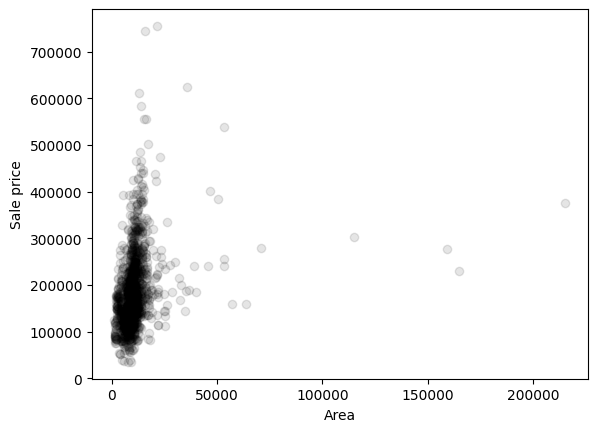

In [10]:
plt.scatter(df["LotArea"], df["SalePrice"], color="black", alpha=0.1)
plt.ylabel('Sale price')
plt.xlabel('Area')
plt.show()

# Linear Regression

f_wb = w * x[i] + b

In [11]:
np.zeros(df["LotArea"].shape)

array([0., 0., 0., ..., 0., 0., 0.])

In [12]:
def calculate_model_output(w, b, x):
    f_wb = np.zeros(x.shape)
    for i in range (len(x)):
        f_wb[i] = w * x[i] + b

    return f_wb

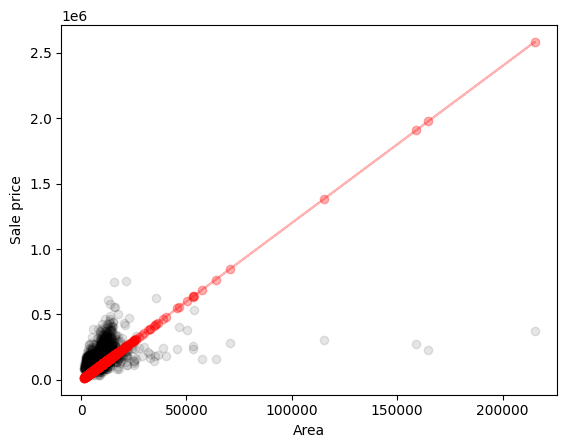

In [13]:
len(df)

outputs = calculate_model_output(12, -220, df["LotArea"])

plt.scatter(df["LotArea"], df["SalePrice"], color="black", alpha=0.1)
plt.plot(df["LotArea"], outputs, color="red", marker="o", alpha=0.3)
plt.ylabel('Sale price')
plt.xlabel('Area')
plt.show()


# Cost function

J(w, b) = 1/(2m) * SUM(y'(i) - y(i))^2


In [14]:
def cost_function(w, b, x, y):
    """
    Computes the cost for linear regression

    Args:
        w (scalar):             parameter of the model
        b (scalar):             parameter of the model
        x (ndarray): Shape (m,) variable
        y (ndarray): Shape (m,) target

    Returns:
        cost (scalar): 1/(2*m) * SUM(y(i) - x(i))^2
    """
    
    
    predict = calculate_model_output(w, b, x)
    m = len(x)
    cost_i = 0
    for i in range (len(x)):
        cost_i += (y[i] - predict[i])**2

    return (1/m) * cost_i

In [15]:
cost_function(10, 200, df["LotArea"], df["SalePrice"])

17789417357.436985

One variable changes, another remains constant

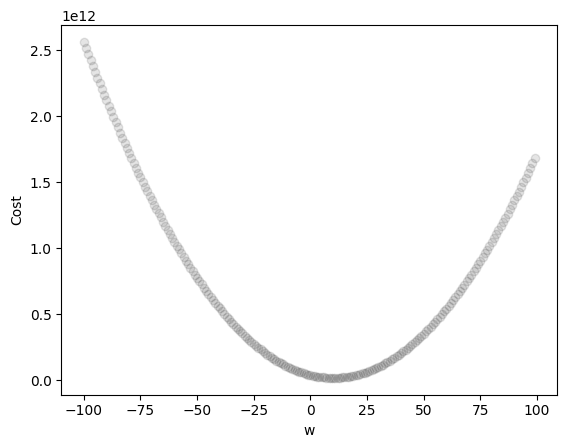

In [16]:
for i in range(-100, 100):
    cost = cost_function(i, 200, df["LotArea"], df["SalePrice"])
    plt.scatter(i, cost, color="black", alpha=0.1)


plt.ylabel('Cost')
plt.xlabel('w')
plt.show()

Both variables change

In [17]:
w_i = []
b_i = []
costs = []

for i in range(-25, 50):
    for j in range(-25, 50):
        w_i.append(i)
        b_i.append(j)
        cost = cost_function(i, j, df["LotArea"], df["SalePrice"])
        costs.append(cost)

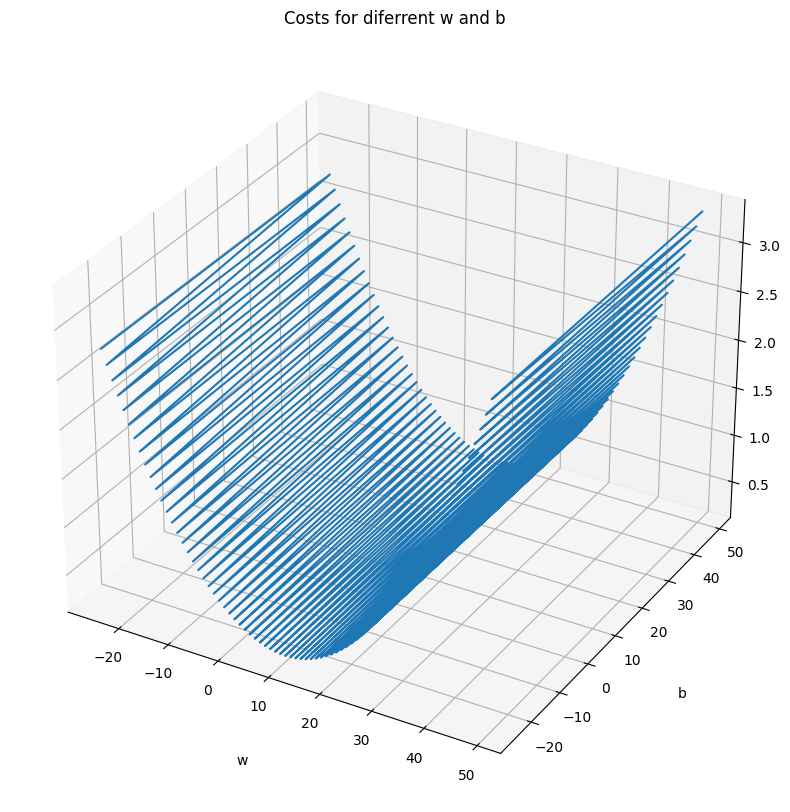

In [18]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.plot3D(w_i, b_i, costs)

ax.set_xlabel('w', labelpad=20)
ax.set_ylabel('b', labelpad=20)
ax.set_zlabel('cost', labelpad=20)

ax.set_title('Costs for diferrent w and b')
plt.show()

# Gradient Descent

In [282]:
def compute_gradient(x, y, w, b):
    """
    Computes the gradient using formula

    Args:
        x (_type_): _description_
        y (_type_): _description_
        w (_type_): _description_
        b (_type_): _description_

    Returns:
        _type_: _description_
    """
    
    m = len(x)
    j_wb_der_w = 0
    j_wb_der_b = 0

    # Calculate the sum from the formula
    for i in range(m):
        f_wb_i = w * x[i] + b
        
        # Sum of partial derivatives of cost for this example
        j_wb_der_w += (f_wb_i - y[i]) * x[i]
        j_wb_der_b += (f_wb_i - y[i])

    j_wb_der_w = (1/m) * j_wb_der_w
    j_wb_der_b = (1/m) * j_wb_der_b
    
    return j_wb_der_w, j_wb_der_b


def gradient_descent(x, y, lr=0.0000001, thold=1e-6, iterations=100):
    w = np.random.rand()
    b = np.random.rand()

    temp_w = 0
    temp_b = 0
    current_cost = float('inf')
    previous_cost = None
    w_history = []
    b_history = []
    costs_history = []
    it = 0
    
    while it < iterations:
        j_wb_der_w, j_wb_der_b = compute_gradient(x, y, w, b)
        temp_w = w - lr * j_wb_der_w
        temp_b = b - lr * j_wb_der_b
        
        current_cost = cost_function(w, b, x, y) 
        
        if previous_cost and abs(previous_cost-current_cost)<=thold:
            break
        
        previous_cost = current_cost
        
        w_history.append(temp_w)
        b_history.append(temp_b)
        costs_history.append(current_cost)
        
        w = temp_w
        b = temp_b
        
        it += 1
        
        # Printing the parameters for every 100th iteration
        if it % 100 == 0:
            print(f"Iteration {it}: Cost {current_cost}, Weight {w}, Bias {b}")
    
    return w, b, w_history, b_history, costs_history


def plot_gradient_descent(w_history, b_history, costs_history):
    # Plot
    plt.figure(figsize=(10,10))
    plt.plot(w_history, costs_history)
    plt.scatter(w_history, costs_history, marker='o', color='red')
    plt.xlabel('w', labelpad=20)
    plt.ylabel('cost', labelpad=20)
    plt.title('costs_history for different w')
    plt.show()
    
    iterations_array = np.arange(1, len(costs_history) + 1)
    # Plot
    plt.figure(figsize=(10,10))
    plt.plot(iterations_array, costs_history)
    plt.scatter(iterations_array, costs_history, marker='o', color='red')
    plt.xlabel('iterations', labelpad=20)
    plt.ylabel('cost', labelpad=20)
    plt.title('costs_history by iterations')
    plt.show()
    
    
    # Plot
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot3D(w_history, b_history, costs_history)
    ax.scatter(w_history, b_history, costs_history, color='red')  # Adicione scatter em 3D
    ax.plot
    ax.set_xlabel('w', labelpad=20)
    ax.set_ylabel('b', labelpad=20)
    ax.set_zlabel('cost', labelpad=20)
    ax.set_title('Costs for different w and b')
    plt.show()

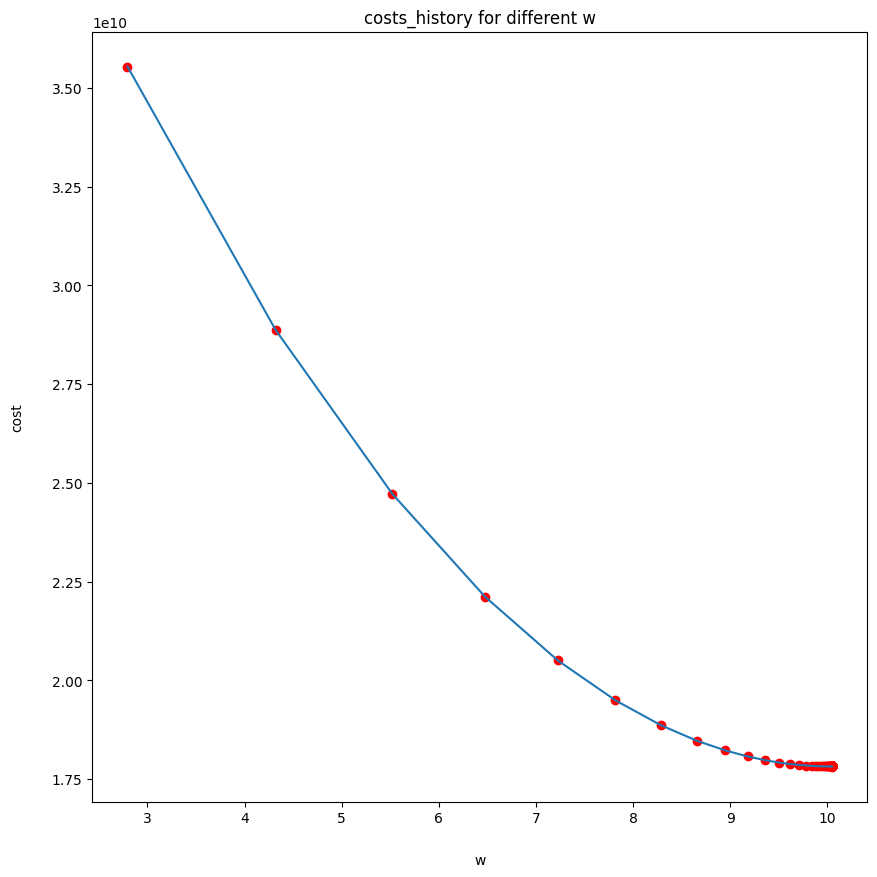

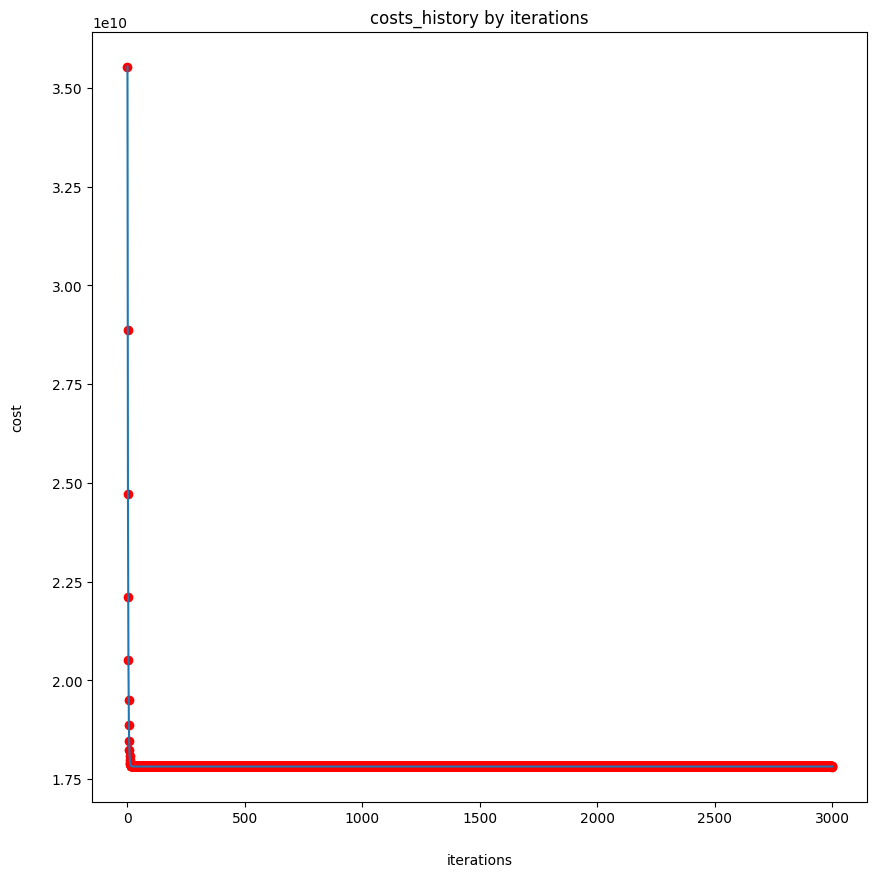

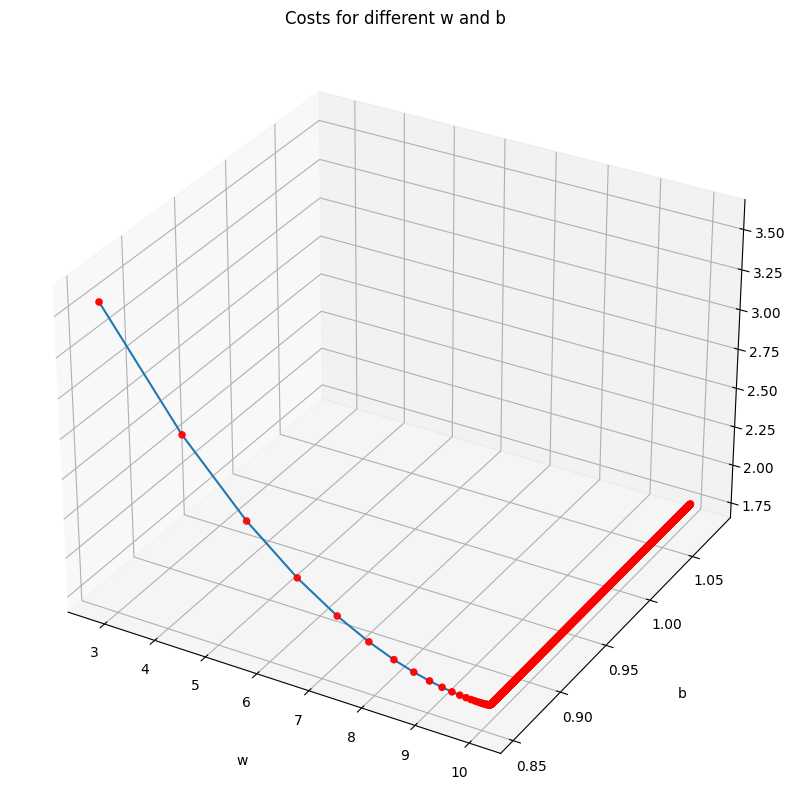

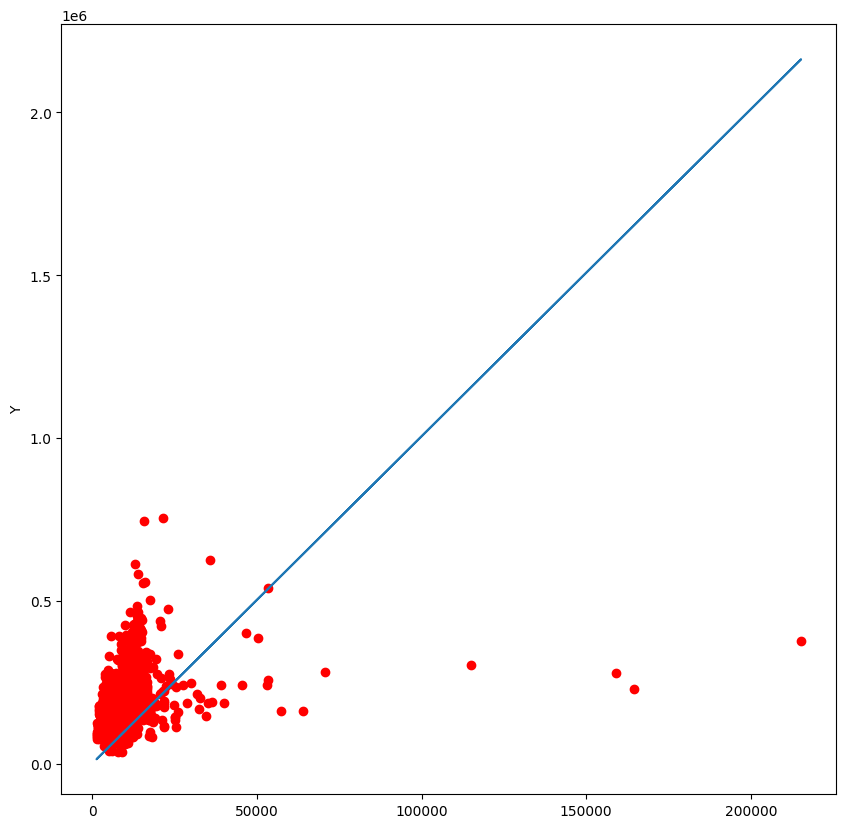

In [283]:
X = df["LotArea"]
Y =  df['SalePrice']

# Test our algorithm
w, b, w_history, b_history, costs_history = gradient_descent(x = X, y = Y, lr = 0.000000001, iterations=3000)

plot_gradient_descent(w_history, b_history, costs_history)


y_calculated = calculate_model_output(w, b, X)


fig = plt.figure(figsize=(10,10))

plt.plot(X, y_calculated)
plt.scatter(X, Y, color='red')
plt.ylabel('Y')

plt.show()

Our algorithm works for fitting a relationship between 2 variables.

# Vectorization

Andrew Ng in his ML Course recommends using vectorization to accelerate calculation on code. So we will be implementing this 

In [259]:
def calculate_model_output(w, b, x):
    f_wb = np.dot(x, w) + b  # Vectorized
    return f_wb


def cost_function(w, b, x, y):
    """
    Computes the cost for linear regression

    Args:
        w (scalar):             parameter of the model
        b (scalar):             parameter of the model
        x (ndarray): Shape (m,) variable
        y (ndarray): Shape (m,) target

    Returns:
        cost (scalar): 1/(2*m) * SUM(y(i) - x(i))^2
    """
    
    predict = calculate_model_output(w, b, x)
    m = len(x)
    cost_i = np.sum((y - predict)**2)  # Vectorized
    
    return (1/m) * cost_i


def compute_gradient(x, y, w, b):
    """
    Computes the gradient using formula

    Args:
        x (ndarray): Shape (m,) variable
        y (ndarray): Shape (m,) target
        w (scalar): Parameter of the model
        b (scalar): Parameter of the model

    Returns:
        j_wb_der_w (scalar): Partial derivative of cost with respect to w
        j_wb_der_b (scalar): Partial derivative of cost with respect to b
    """
    
    m = len(x)
    f_wb = calculate_model_output(w, b, x)
    j_wb_der_w = np.sum((f_wb - y) * x)
    j_wb_der_b = np.sum(f_wb - y)

    j_wb_der_w *= (1 / m)
    j_wb_der_b *= (1 / m)
    
    return j_wb_der_w, j_wb_der_b

# Multiple Linear Regression

In [340]:
def calculate_model_output_multiple(w, b, x):
    """
    Computes the model output for multiple linear regression

    Args:
        w (ndarray): Shape (n,) parameter of the model
        b (scalar): Parameter of the model
        x (ndarray): Shape (m, n) variable, where m is the number of samples and n is the number of features

    Returns:
        f_wb (ndarray): Shape (m,) model output for each sample
    """
    f_wb = np.dot(x, w) + b
    return f_wb


def compute_gradient_multiple(x, y, w, b):
    """
    Computes the gradient using formula

    Args:
        x (ndarray): Shape (m, n) variable, where m is the number of samples and n is the number of features
        y (ndarray): Shape (m,) target
        w (ndarray): Shape (n,) parameter of the model
        b (scalar): Parameter of the model

    Returns:
        j_wb_der_w (ndarray): Partial derivative of cost with respect to w, shape (n,)
        j_wb_der_b (scalar): Partial derivative of cost with respect to b
    """
    
    m = len(x)
    f_wb = calculate_model_output_multiple(w, b, x)
    j_wb_der_w = np.dot((f_wb - y), x)
    j_wb_der_b = np.sum(f_wb - y)
    
    j_wb_der_w = np.multiply(j_wb_der_w, 1/m)
    j_wb_der_b *= (1 / m)
    
    
    return j_wb_der_w, j_wb_der_b


def multiple_linear_regression(x, y, lr=0.00000001, thold=1e-6, iterations=1000):
    w = [np.random.randint(-100, 1000) for _ in X.columns]
    b = np.random.randint(-100, 1000)
    
    number_variables = len(X.columns)
    temp_w = np.zeros(number_variables)
    temp_b = 0
    w_history = []
    b_history = []
    costs_history = []  # current cost = costs_history[-1] / last cost = costs_history[-2]
    it = 0
    
    while it < iterations:
        j_wb_der_w, j_wb_der_b = compute_gradient_multiple(x, y, w, b)
        temp_w = w - lr * j_wb_der_w
        temp_b = b - lr * j_wb_der_b
        
        costs_history.append(cost_function(w, b, x, y) )
        w_history.append(temp_w)
        b_history.append(temp_b)
        
        w = temp_w
        b = temp_b
        
        it += 1
        
        # Printing the parameters for every 100th iteration
        if it % 100 == 0:
            print(f"Iteration {it}: Cost {costs_history[-1]}, Weight {w}, Bias {b}")
            
            
        if len(costs_history) >= 2 and abs(costs_history[-2] - costs_history[-1]) <= thold:
            break
        
    return w, b, w_history, b_history, costs_history

In [354]:
X = df[["LotArea", "OverallQual", "YearBuilt"]]
w, b, w_history, b_history, costs_history = multiple_linear_regression(X, Y, lr=1e-15, iterations=2e5)

Iteration 100: Cost 186279024014679.06, Weight [943.98021408 890.99999383  72.99804874], Bias 836.9999990102965
Iteration 200: Cost 186271118548545.38, Weight [943.96042859 890.99998767  72.99609752], Bias 836.999998020614
Iteration 300: Cost 186263213417951.7, Weight [943.94064351 890.9999815   72.99414635], Bias 836.9999970309531
Iteration 400: Cost 186255308622883.75, Weight [943.92085885 890.99997534  72.99219522], Bias 836.9999960413136
Iteration 500: Cost 186247404163327.47, Weight [943.90107461 890.99996917  72.99024413], Bias 836.9999950516951
Iteration 600: Cost 186239500039268.38, Weight [943.8812908  890.99996301  72.98829308], Bias 836.9999940620978
Iteration 700: Cost 186231596250692.44, Weight [943.8615074  890.99995684  72.98634207], Bias 836.9999930725215
Iteration 800: Cost 186223692797585.3, Weight [943.84172442 890.99995068  72.9843911 ], Bias 836.9999920829663
Iteration 900: Cost 186215789679932.84, Weight [943.82194186 890.99994451  72.98244018], Bias 836.999991093

In [355]:
w1_history = [w[0] for w in w_history]
w2_history = [w[1] for w in w_history]
w3_history = [w[2] for w in w_history]

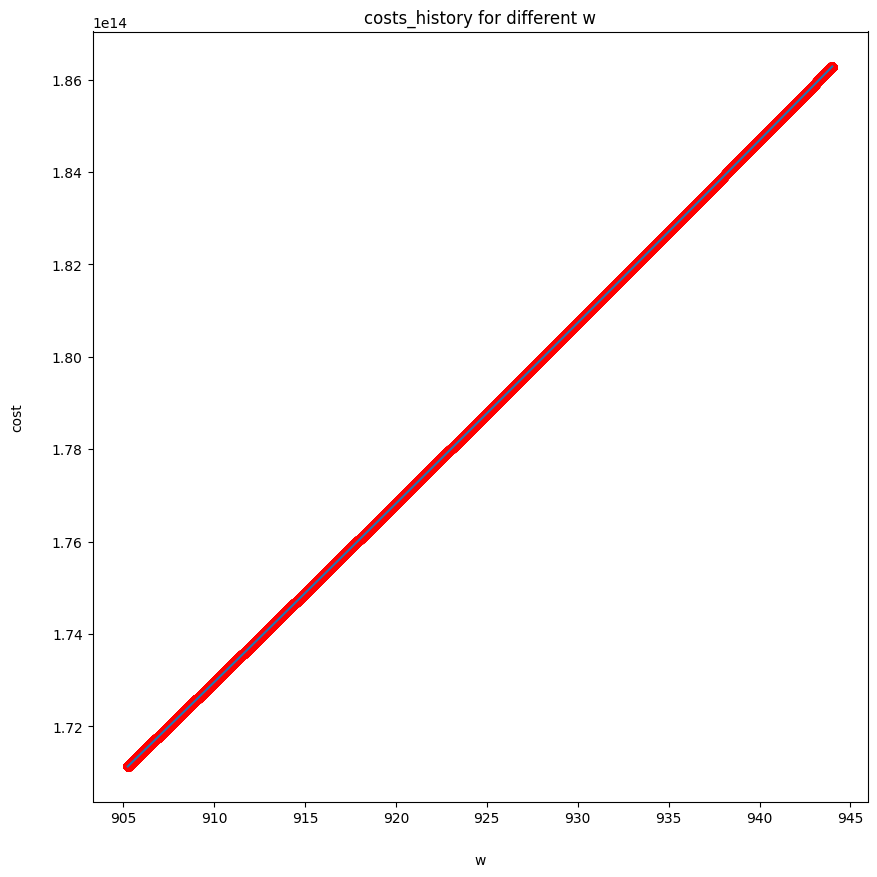

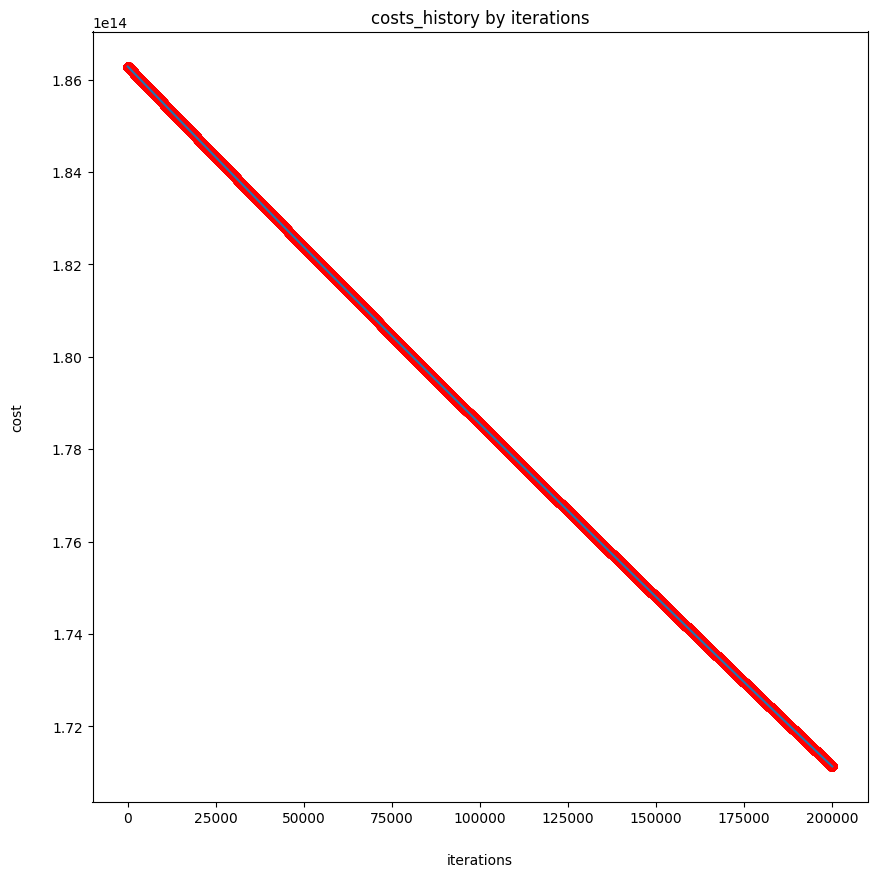

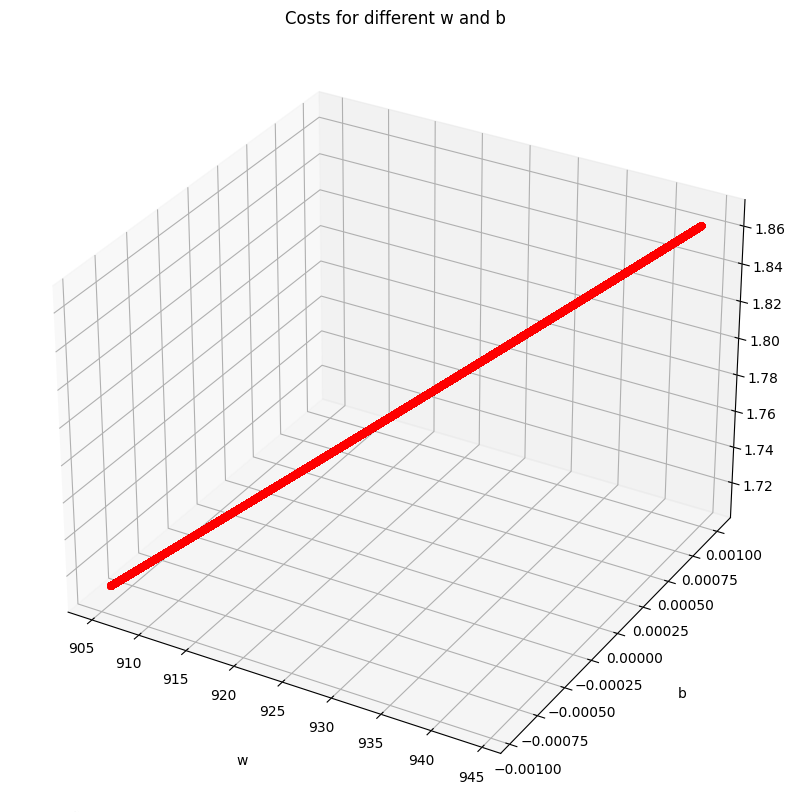

In [357]:
plot_gradient_descent(w1_history, b_history, costs_history)